# Insurance Claims- Fraud Detection
Project 10

In [1]:
#Importing All Libraries required to build Model:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
#!pip install -U imbalanced-learn
#!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
#import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_roc_curve

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
#pd.set_option('display.max_columns',None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

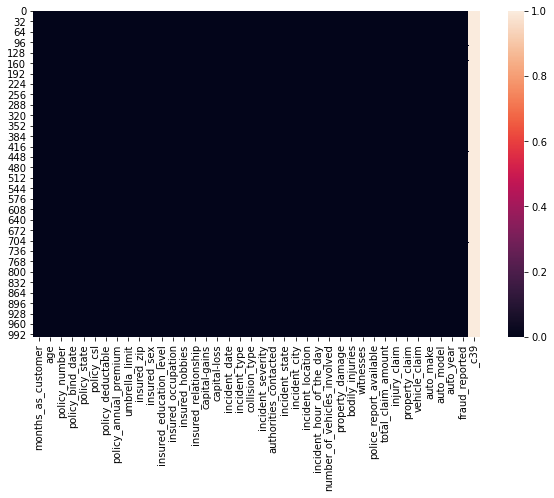

In [7]:
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())

In [8]:
df[df=="?"].any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [9]:
df.drop(['_c39'], axis = 1, inplace = True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [10]:
df['collision_type'].value_counts() 

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [11]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [12]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [13]:
df["collision_type"]=df["collision_type"].str.replace("?","Unknown Collision")

In [14]:
df.collision_type.value_counts()

Rear Collision       292
Side Collision       276
Front Collision      254
Unknown Collision    178
Name: collision_type, dtype: int64

In [15]:
df["property_damage"]=df["property_damage"].str.replace("?","Unknown")

In [16]:
df["police_report_available"]=df["police_report_available"].str.replace("?","Unknown")

In [17]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# EDA:

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

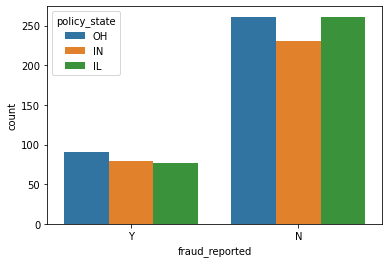

In [18]:
sns.countplot(x=df['fraud_reported'],hue=df['policy_state'],data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

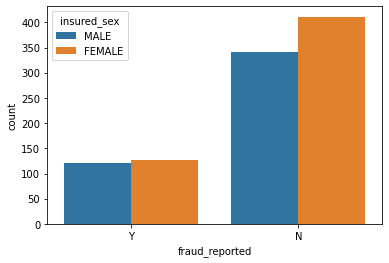

In [19]:
sns.countplot(x=df['fraud_reported'],hue=df['insured_sex'],data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

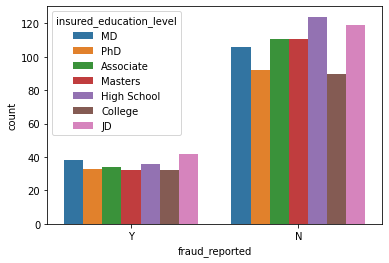

In [20]:
sns.countplot(x=df['fraud_reported'],hue=df['insured_education_level'],data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

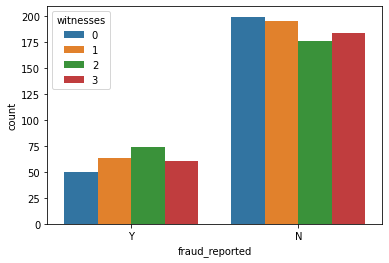

In [21]:
sns.countplot(x=df['fraud_reported'],hue='witnesses',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

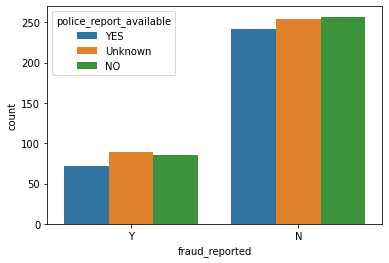

In [22]:
sns.countplot(x=df['fraud_reported'],hue='police_report_available',data=df)

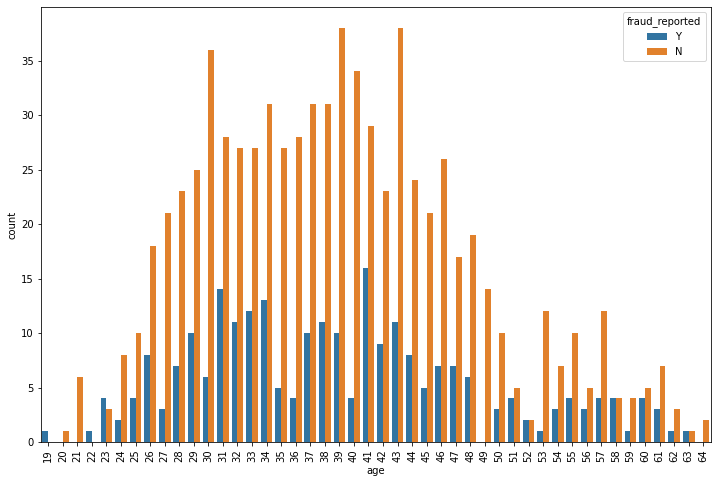

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['age'],hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

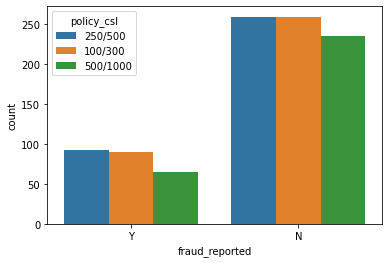

In [24]:
sns.countplot(x=df['fraud_reported'],hue=df['policy_csl'],data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

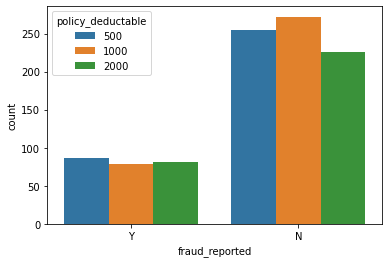

In [25]:
sns.countplot(x=df['fraud_reported'],hue=df['policy_deductable'],data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

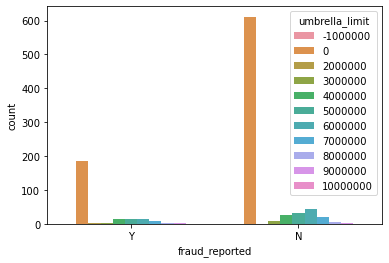

In [26]:
sns.countplot(x=df['fraud_reported'],hue=df['umbrella_limit'],data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

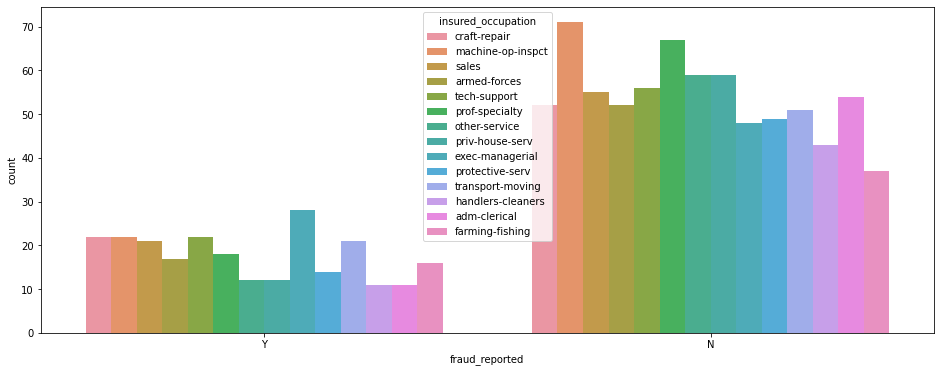

In [27]:
plt.figure(figsize=[16,6])
sns.countplot(x=df['fraud_reported'],hue=df['insured_occupation'],data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

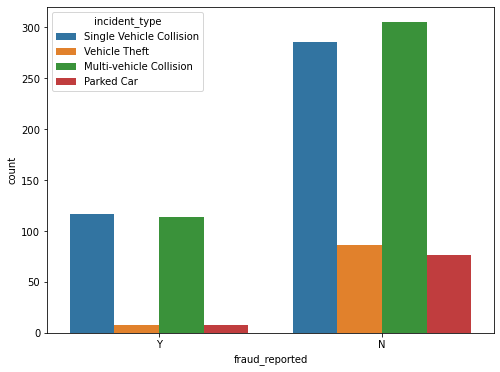

In [28]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['fraud_reported'],hue=df['incident_type'],data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

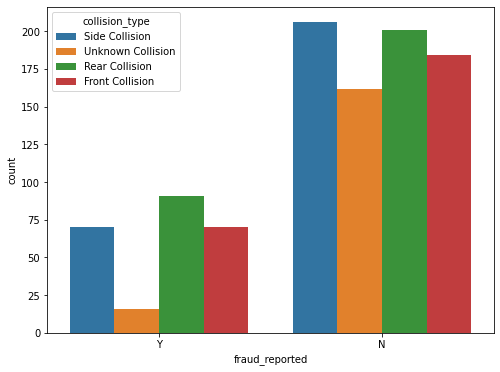

In [29]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['fraud_reported'],hue=df['collision_type'],data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

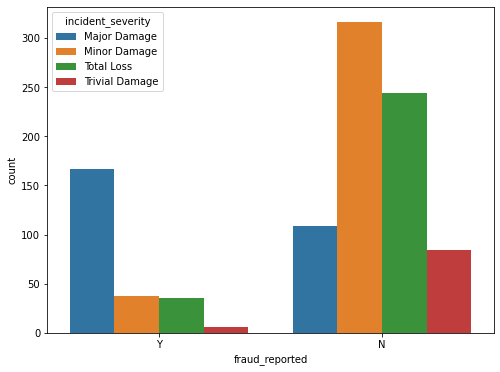

In [30]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['fraud_reported'],hue=df['incident_severity'],data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

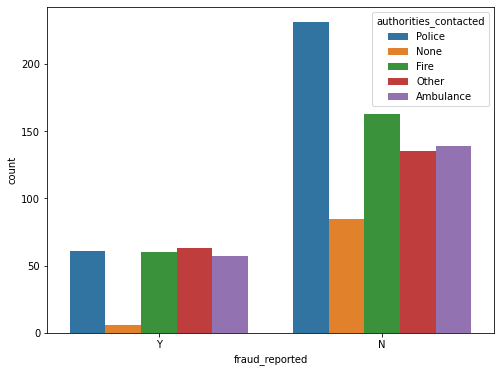

In [31]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['fraud_reported'],hue=df['authorities_contacted'],data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

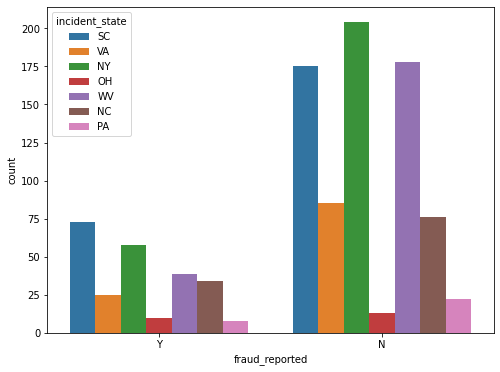

In [32]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['fraud_reported'],hue=df['incident_state'],data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

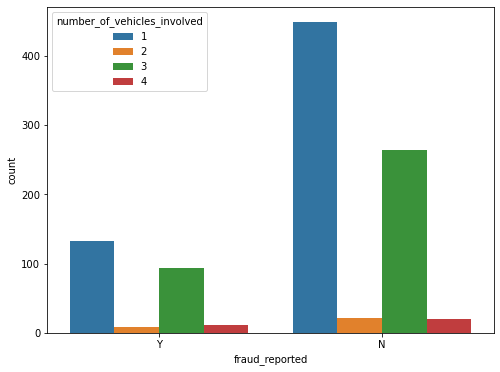

In [33]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['fraud_reported'],hue=df['number_of_vehicles_involved'],data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

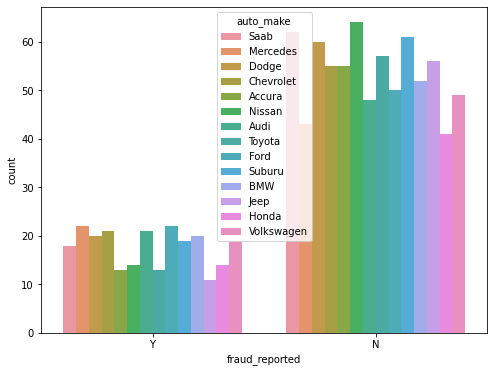

In [34]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['fraud_reported'],hue=df['auto_make'],data=df)

<AxesSubplot:xlabel='auto_year', ylabel='count'>

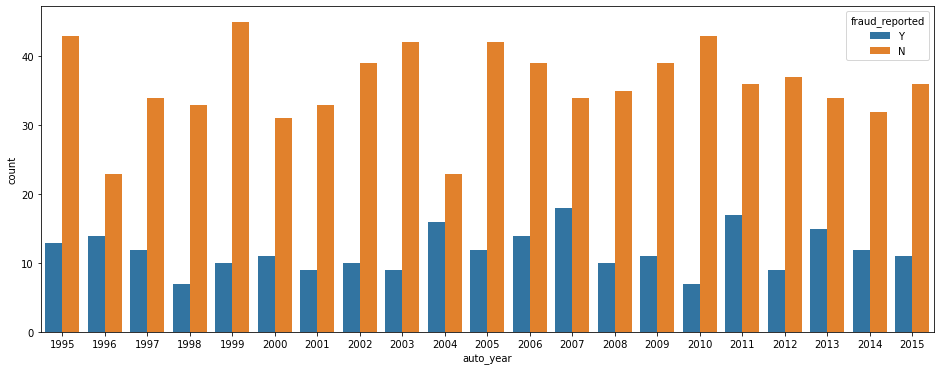

In [35]:
plt.figure(figsize=[16,6])
sns.countplot(x=df['auto_year'],hue=df['fraud_reported'],data=df)

<AxesSubplot:title={'center':'Gendeg Vs Insured claim Amount'}, xlabel='insured_sex', ylabel='total_claim_amount'>

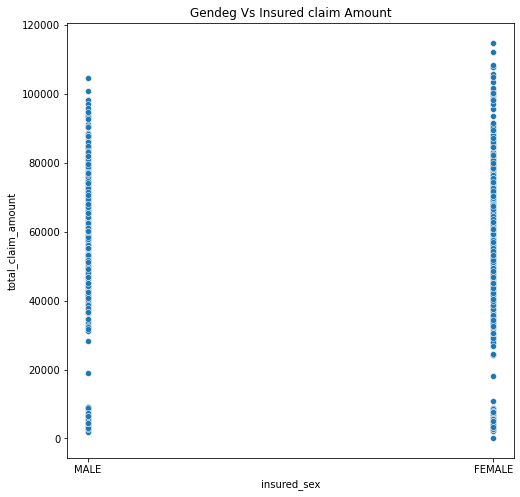

In [36]:
plt.figure(figsize=[8,8])
plt.title('Gendeg Vs Insured claim Amount')
sns.scatterplot(df['insured_sex'],df['total_claim_amount'],palette='bright')

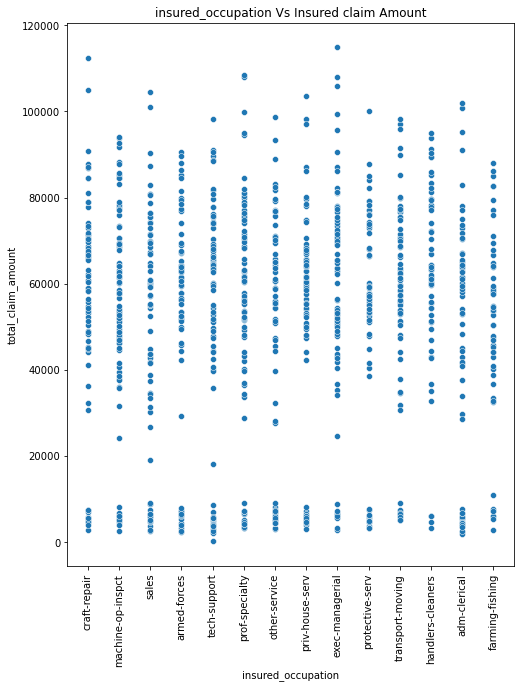

In [37]:
plt.figure(figsize=[8,10])
plt.title('insured_occupation Vs Insured claim Amount')
sns.scatterplot(df['insured_occupation'],df['total_claim_amount'],palette='bright')
plt.xticks(rotation=90)
plt.show()

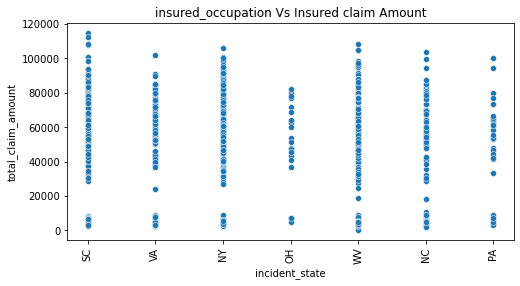

In [38]:
plt.figure(figsize=[8,4])
plt.title('insured_occupation Vs Insured claim Amount')
sns.scatterplot(df['incident_state'],df['total_claim_amount'],palette='bright')
plt.xticks(rotation=90)
plt.show()

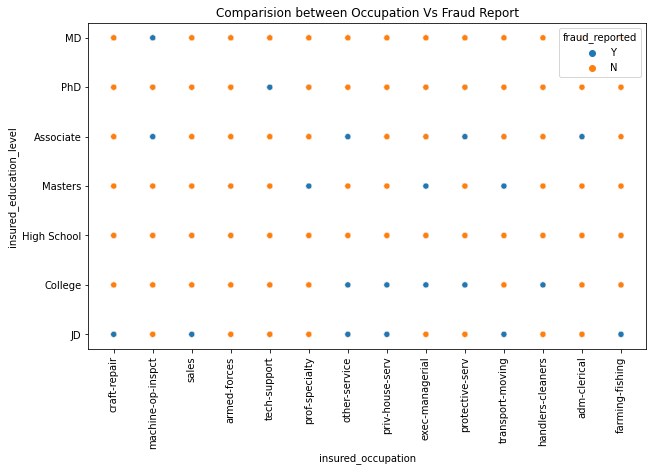

In [39]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Occupation Vs Fraud Report')
sns.scatterplot(df['insured_occupation'],df['insured_education_level'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()


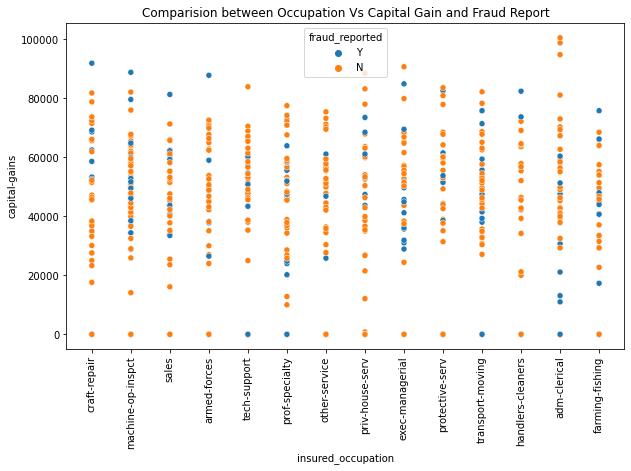

In [40]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Occupation Vs Capital Gain and Fraud Report')
sns.scatterplot(df['insured_occupation'],df['capital-gains'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()


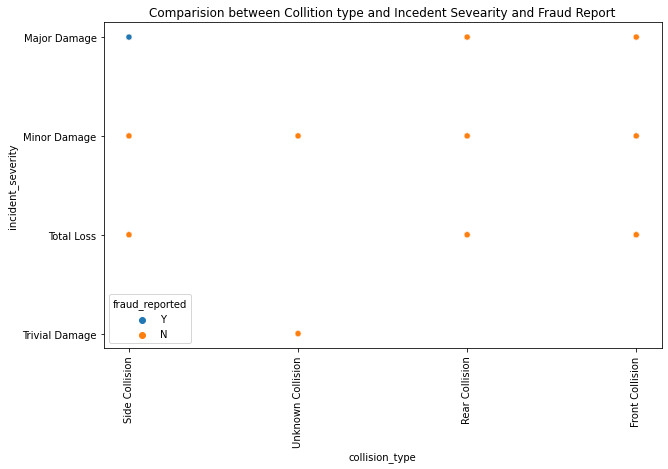

In [41]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Collition type and Incedent Sevearity and Fraud Report')
sns.scatterplot(df['collision_type'],df['incident_severity'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()


In [42]:
df_dropped_column=df.copy()

In [43]:
df_dropped_cloumn=df_dropped_column.drop(['policy_number','policy_bind_date','policy_csl','insured_hobbies','insured_zip','incident_date','total_claim_amount'],inplace=True,axis=1)

In [44]:
df_dropped_column.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,2,YES,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,0,0,Unknown,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,0,1,NO,1300,650,4550,Accura,RSX,2009,N


In [45]:
obj_df = df_dropped_column.select_dtypes(include=['object']).copy()
obj_df.head()

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,IN,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Unknown Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,Unknown,Unknown,Mercedes,E400,Y
2,OH,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,IL,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,Unknown,NO,Chevrolet,Tahoe,Y
4,IL,MALE,Associate,sales,unmarried,Vehicle Theft,Unknown Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [46]:
df_dropped_column.shape

(1000, 32)

In [47]:
LE=LabelEncoder()
for column in obj_df:
    df_dropped_column.loc[:,column] = LE.fit_transform(df_dropped_column.loc[:,column])
df_dropped_column.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1000,1406.91,0,1,4,2,0,...,1,2,2,6510,13020,52080,10,1,2004,1
1,228,42,1,2000,1197.22,5000000,1,4,6,2,...,0,0,1,780,780,3510,8,12,2007,1
2,134,29,2,2000,1413.14,5000000,0,6,11,3,...,2,3,0,7700,3850,23100,4,30,2007,0
3,256,41,0,2000,1415.74,6000000,0,6,1,4,...,1,2,0,6340,6340,50720,3,34,2014,1
4,228,44,0,1000,1583.91,6000000,1,0,11,4,...,0,1,0,1300,650,4550,0,31,2009,0


### Multivariate Analysis:

In [48]:
corr_mat=df_dropped_column.corr()
corr_mat

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,0.069727,...,-0.010162,0.058383,-0.055712,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,0.074832,...,-0.015679,0.052359,-0.049797,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,-0.018506,...,0.013384,0.022960,0.046682,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_deductable,0.026807,0.029188,0.010033,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,-0.022945,...,-0.022765,0.066639,0.035213,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,0.001925,...,0.026780,0.002332,0.024188,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,0.077495,...,0.022743,-0.006738,-0.021005,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_sex,0.060925,0.073337,-0.020481,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,0.002855,...,-0.020297,0.042463,-0.008846,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,-0.023488,...,-0.012072,0.019211,0.052622,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808
insured_occupation,0.009814,0.017220,-0.031215,-0.046733,0.035922,0.023422,-0.006160,-0.020298,1.000000,-0.010171,...,-0.000236,-0.014794,-0.032288,0.020211,0.003004,-0.000829,0.042621,0.020584,-0.006676,0.001564
insured_relationship,0.069727,0.074832,-0.018506,-0.022945,0.001925,0.077495,0.002855,-0.023488,-0.010171,1.000000,...,-0.001214,0.002362,-0.005831,0.029014,0.007332,-0.006256,-0.027028,0.063671,-0.023345,0.021043


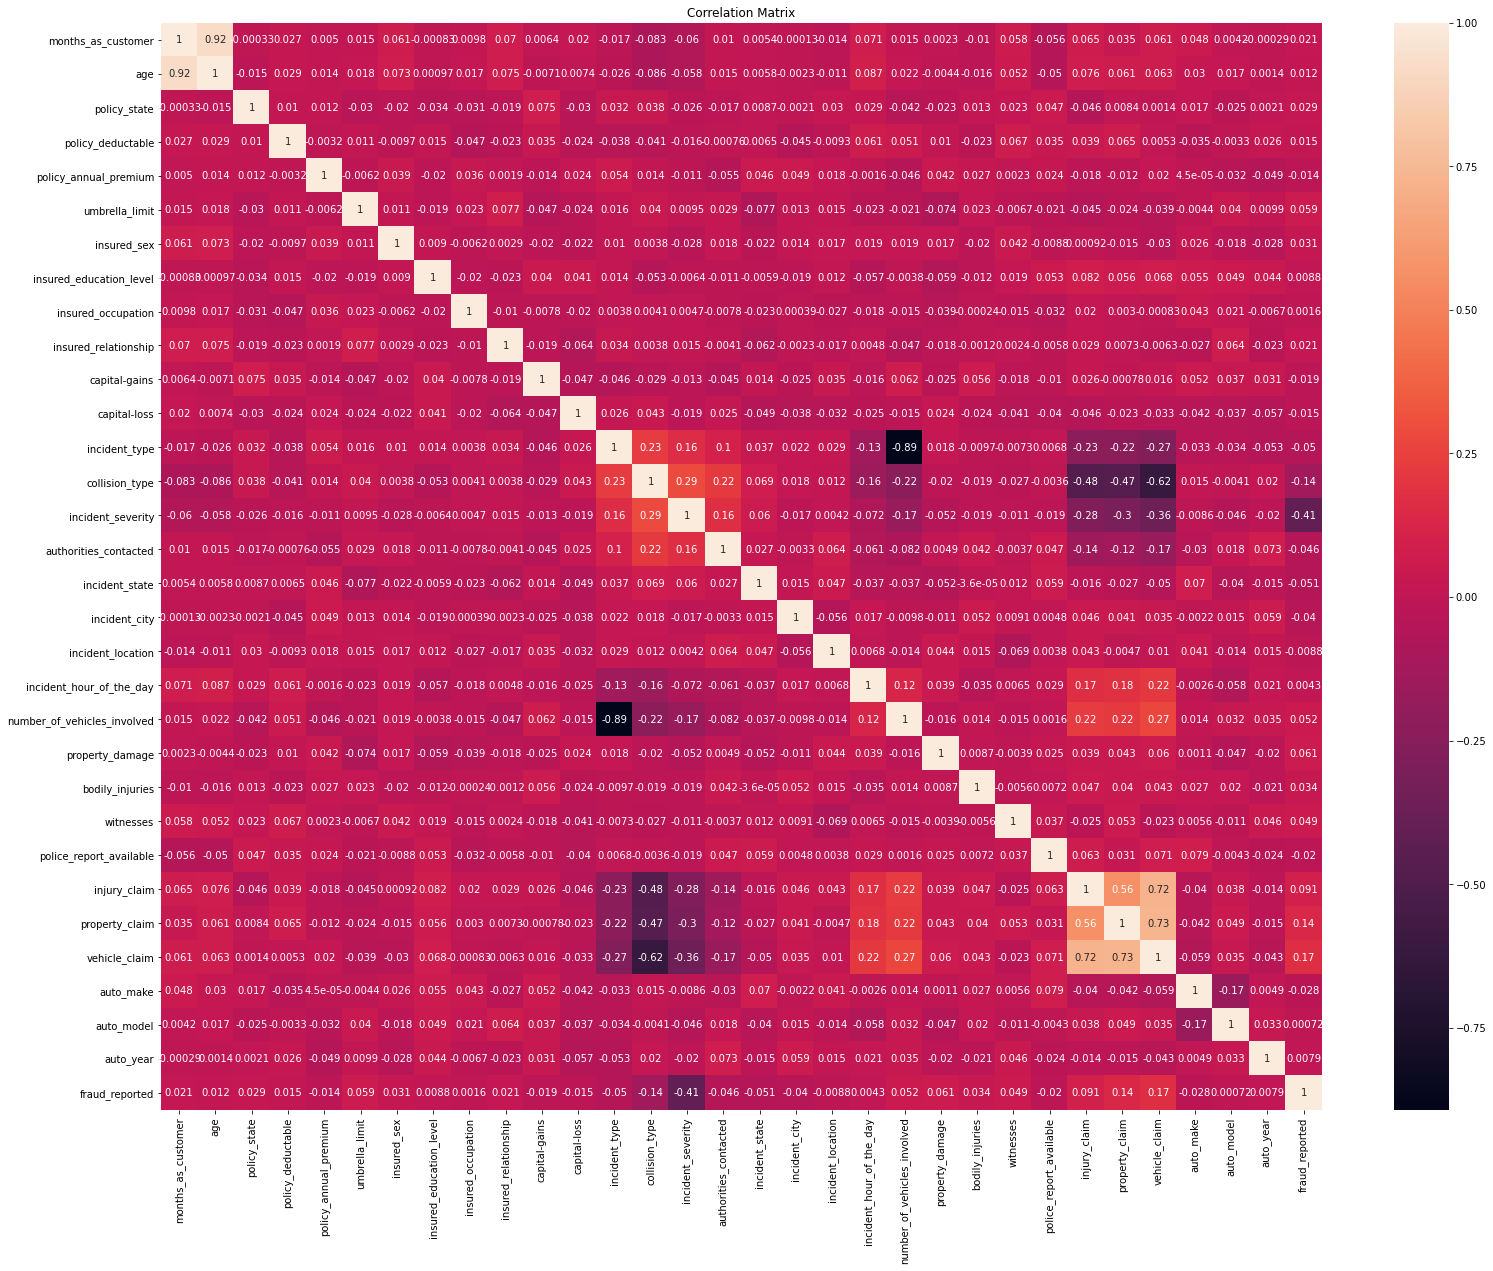

In [49]:
plt.figure(figsize=[26,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Lets Check Outliers with Box Plot:

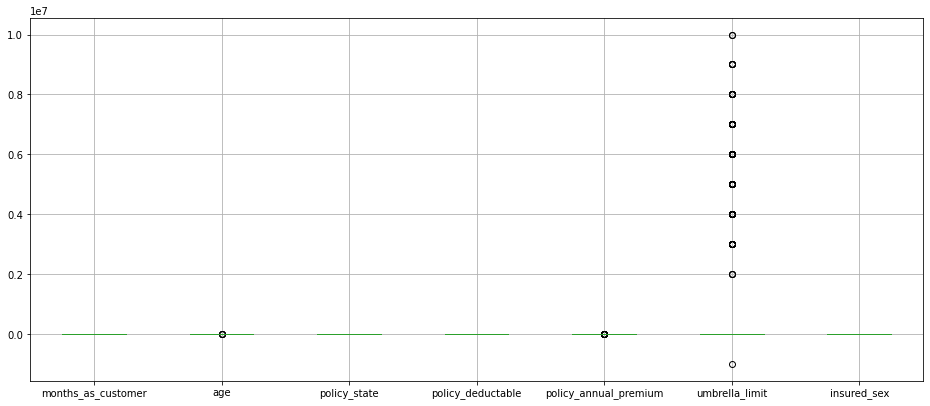

In [50]:
df_dropped_column.iloc[:,0:7].boxplot(figsize=[16,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

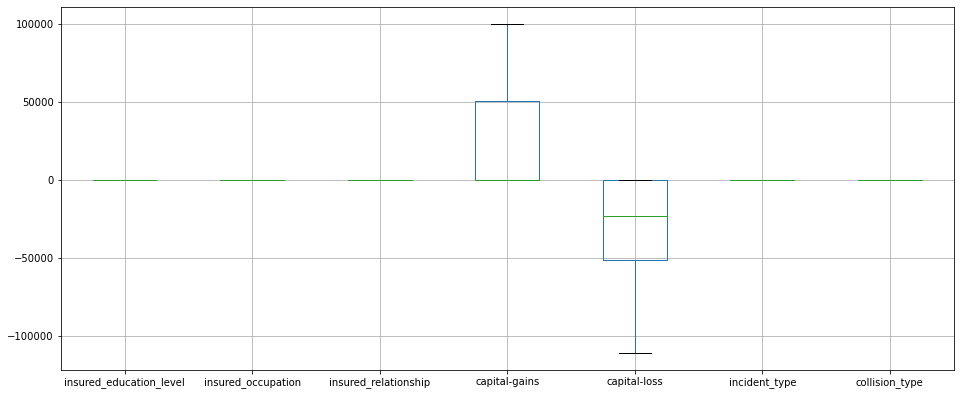

In [51]:
df_dropped_column.iloc[:,7:14].boxplot(figsize=[16,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

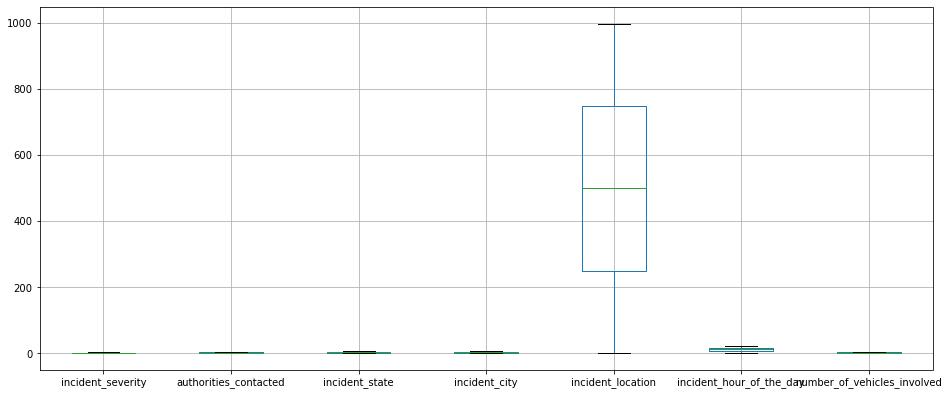

In [52]:
df_dropped_column.iloc[:,14:21].boxplot(figsize=[16,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

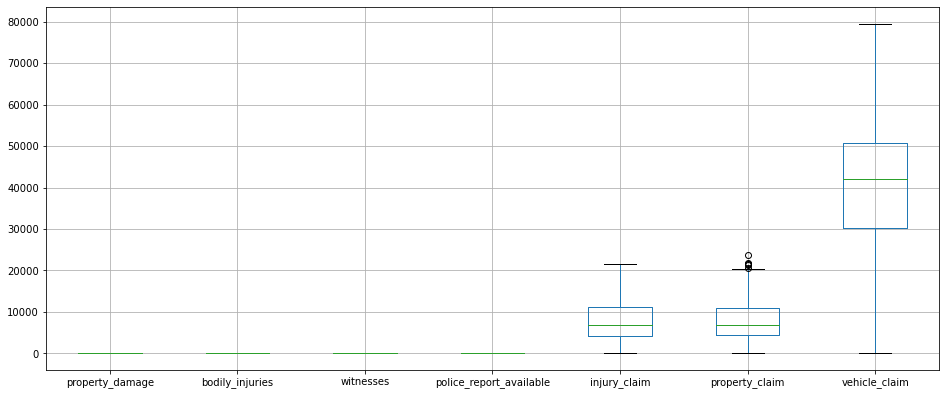

In [53]:
df_dropped_column.iloc[:,21:28].boxplot(figsize=[16,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Outliers Removal:

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(df_dropped_column))
df_zscore=df_dropped_column[(z<3).all(axis=1)]

In [55]:
df_zscore.shape

(980, 32)

In [56]:
df_dropped_column.shape

(1000, 32)

In [57]:
((1000-980)/1000)*100

2.0

In [58]:
x1=df_zscore.drop(columns=["fraud_reported"])
y1=df_zscore[["fraud_reported"]]

In [59]:
x1.shape , y1.shape

((980, 31), (980, 1))

# Skewness Checking:

In [60]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x1)
df_skew=pd.DataFrame(df_skew,columns=x1.columns)

In [61]:
x1=df_skew

# Scaling:
To reduce the scaling difference between columns

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x1 = scaler.fit_transform(x1)

In [63]:
ms=MinMaxScaler()
ms.fit(df_skew)
x1=ms.transform(df_skew)
x1=pd.DataFrame(x1,columns=df_skew.columns)

In [64]:
from imblearn.over_sampling import RandomOverSampler

# Sampling (up sampling):
To make balancing in dataset

In [65]:
random_over_sampler = RandomOverSampler()

In [66]:
x,y=random_over_sampler.fit_resample(x1,y1)

In [67]:
x.shape , y.shape

((1480, 31), (1480, 1))

In [68]:
y1.value_counts()

fraud_reported
0                 740
1                 240
dtype: int64

# Best Random State Checking:

In [69]:
maximum_accuracy=0
maximum_randomstate=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr=RandomForestClassifier()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
#   acc=(r2_score(y_test,pred))
    if acc>maximum_accuracy:
        maximum_accuracy=acc
        maximum_randomstate=i
print("Best accuracy is  "  ,maximum_accuracy , "  at random_state:", maximum_randomstate)

Best accuracy is   0.9628378378378378   at random_state: 23


# Model Building:

### Let try to check accuracy with 4 to 5 models for best performances:

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=maximum_randomstate)

In [71]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(f1_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8817567567567568
0.8923076923076925
[[116  29]
 [  6 145]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       145
           1       0.83      0.96      0.89       151

    accuracy                           0.88       296
   macro avg       0.89      0.88      0.88       296
weighted avg       0.89      0.88      0.88       296



In [72]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(f1_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9527027027027027
0.9551282051282052
[[133  12]
 [  2 149]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       145
           1       0.93      0.99      0.96       151

    accuracy                           0.95       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



In [73]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7398648648648649
[[ 92  53]
 [ 24 127]]
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       145
           1       0.71      0.84      0.77       151

    accuracy                           0.74       296
   macro avg       0.75      0.74      0.74       296
weighted avg       0.75      0.74      0.74       296



In [74]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.8344594594594594
[[118  27]
 [ 22 129]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       145
           1       0.83      0.85      0.84       151

    accuracy                           0.83       296
   macro avg       0.83      0.83      0.83       296
weighted avg       0.83      0.83      0.83       296



In [75]:
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8952702702702703
[[128  17]
 [ 14 137]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       145
           1       0.89      0.91      0.90       151

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296



In [76]:
scr=cross_val_score(dt,x,y,cv=5,scoring='f1')
print("Cross Validation Score of DecisionTree Model is : ", scr.mean())

Cross Validation Score of DecisionTree Model is :  0.9051807071383429


In [77]:
scr=cross_val_score(rf,x,y,cv=5,scoring='f1')
print("Cross Validation Score of RandomForest Model is : ", scr.mean())

Cross Validation Score of RandomForest Model is :  0.9286747343064615


In [78]:
scr=cross_val_score(svc,x,y,cv=5,scoring='f1')
print("Cross Validation Score of Support Vector Model is : ", scr.mean())

Cross Validation Score of Support Vector Model is :  0.8311169965952574


In [79]:
scr=cross_val_score(gnb,x,y,cv=5,scoring='f1')
print("Cross Validation Score of GussianNB Model is : ", scr.mean())

Cross Validation Score of GussianNB Model is :  0.7154877734547525


In [80]:
scr=cross_val_score(ab,x,y,cv=5,scoring='f1')
print("Cross Validation Score of AdaBoost Model is : ", scr.mean())

Cross Validation Score of AdaBoost Model is :  0.7660087540932101


# 1st Parameter Tuning:
RandomForestClassifier

In [81]:
#parameters={'max_depth': np.arange(2,10),'criterion': ['gini','entropy']}
parameters ={
              "bootstrap": [True,False],
              "criterion" : ["gini", "entropy"],              
             }

In [82]:
gcv=GridSearchCV(RandomForestClassifier(), parameters,cv=5) #Tuning RandomForestClassifier

In [83]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy']})

In [84]:
gcv.best_params_

{'bootstrap': False, 'criterion': 'gini'}

In [85]:
mod=RandomForestClassifier(bootstrap='False',criterion='gini')
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(f1_score(y_test,pred,average="macro")*100)

95.60203440196582


# 2nd Parameter Tuning:
Decision Tree Classifier

In [86]:
#from scipy.stats import randint
#param_dist = {"max_depth": [3, None],"max_features": randint(1, 9),"min_samples_leaf": randint(1, 9),"criterion": ["gini", "entropy"]}
parameters ={"criterion" : ["gini", "entropy"]}

In [87]:
gcv=GridSearchCV(DecisionTreeClassifier(), parameters,cv=5) #Tuning DecisionTreeClassifier

In [88]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [89]:
gcv.best_params_

{'criterion': 'gini'}

In [91]:
mod2=DecisionTreeClassifier(criterion='gini',random_state=maximum_randomstate)
mod2.fit(x_train,y_train)
pred=mod2.predict(x_test)
print(f1_score(y_test,pred)*100)

88.95705521472394


# 3rd Parameter Tuning:
SVC Model

In [92]:
parameters = {'C': [1, 10, 100],'kernel':['poly','rbf','sigmoid']}

In [93]:
gcv=GridSearchCV(SVC(), parameters,cv=5) #Tuning svc

In [94]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [95]:
gcv.best_params_

{'C': 100, 'kernel': 'rbf'}

In [96]:
mod3=SVC(C=100,kernel='rbf',random_state=maximum_randomstate)
mod3.fit(x_train,y_train)
pred=mod3.predict(x_test)
print(f1_score(y_test,pred)*100)

93.58974358974359


# After parameter tuning ,We have got 95.6% accuracy from RandomForestClassifier model.Hence it would be the best model to proceed for Prediction.¶

### Lets Check with AUC-ROC curve:


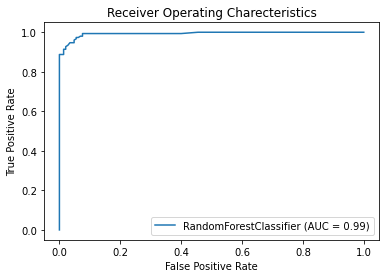

In [97]:
plot_roc_curve(mod,x_test,y_test)
plt.title('Receiver Operating Charecteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

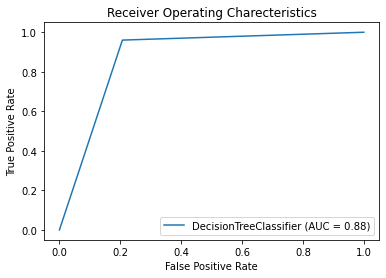

In [98]:
plot_roc_curve(mod2,x_test,y_test)
plt.title('Receiver Operating Charecteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

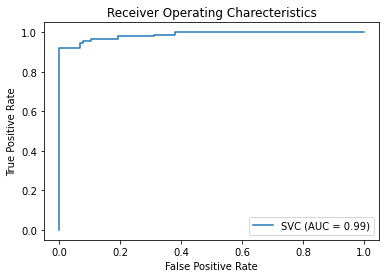

In [99]:
plot_roc_curve(mod3,x_test,y_test)
plt.title('Receiver Operating Charecteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Observation: Seems to be almost 99% with RandomForest model  and SVC model in AUC-ROC plot which is best percentage score.


## Saving the Model:

In [100]:
import joblib
joblib.dump(mod,"fraud_reported.pkl")

['fraud_reported.pkl']

In [101]:
mod=joblib.load("fraud_reported.pkl")

In [102]:
prediction=mod.predict(x_test)

In [104]:
print(f1_score(y_test,prediction,average="macro")*100)

95.60203440196582


In [105]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [106]:
prediction.to_csv('fraud_reported.csv') #Saving the predictions

In [107]:
prediction

,0
0,0
1,1
2,0
3,0
4,1
...,...
291,1
292,1
293,0
294,0


# Summary and Observation:
Hence we have Saved the model and Checked by loading whether its working fine. and checked with predicting.